In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel('orcamento.xlsx')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [5]:
receita_x_despesa_mes = df.groupby(['Ano', 'nº mês', 'Mês', 'Nome conta 1º nível'])['Realizado'].sum()
dados_remodelados = receita_x_despesa_mes.unstack('Nome conta 1º nível')
dados_limpos = dados_remodelados.fillna(0)
dados_limpos
novos_rotulos = [f"{mes[:3]}/{str(ano)[-2:]}" for ano, num_mes, mes in dados_limpos.index]
dados_para_grafico = dados_limpos.copy()
dados_para_grafico.index = novos_rotulos

dados_limpos

Nome conta 1º nível       Despesa     Receita
Ano  nº mês Mês                              
2022 1      JANEIRO     962417.68  2592824.08
     2      FEVEREIRO  1613361.79  2313943.17
     3      MARÇO      2817924.74  2862918.92
     4      ABRIL      2957820.97  2308262.74
     5      MAIO       3761066.92  2802099.03
     6      JUNHO      1009538.55  2481039.70
     7      JULHO      2343279.85  2429640.37
     8      AGOSTO     3609070.93  3006064.94
     9      SETEMBRO   3104711.99  2398914.60
     10     OUTUBRO    3949120.20  2966965.58
     11     NOVEMBRO   3324102.23  2268979.29
     12     DEZEMBRO   3421899.92  2810416.52
2023 1      JANEIRO     832012.53  1514305.95
     2      FEVEREIRO  1359211.76  2134648.58

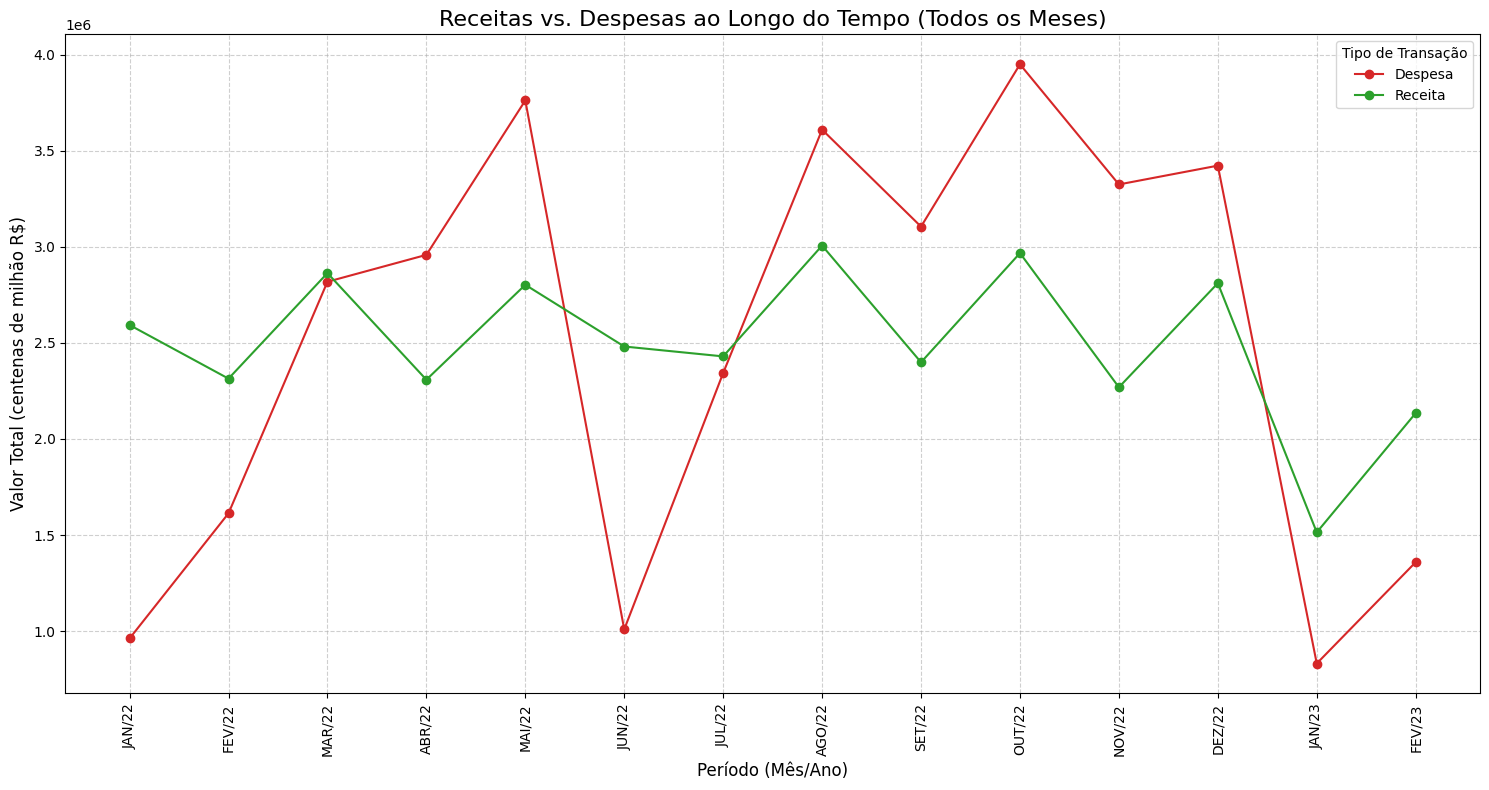

In [10]:
dados_para_grafico.plot(
    kind='line',
    figsize=(15, 8), # Aumentei um pouco a largura para dar mais espaço
    marker='o',
    color=['#d62728', '#2ca02c']
)

# --- AQUI ESTÁ A MUDANÇA ---
# Forçamos a exibição de um "tick" (marcação) para cada mês
plt.xticks(
    ticks=range(len(dados_para_grafico.index)),  # Define as posições (0, 1, 2, ...)
    labels=dados_para_grafico.index,             # Define os textos para essas posições
    rotation=90                                  # Rotaciona para caber todos os rótulos
)
# -------------------------

# Aprimoramentos do gráfico (como antes)
plt.title('Receitas vs. Despesas ao Longo do Tempo (Todos os Meses)', fontsize=16)
plt.xlabel('Período (Mês/Ano)', fontsize=12)
plt.ylabel('Valor Total (centenas de milhão R$)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Tipo de Transação')
plt.tight_layout()

# Salvamos a imagem final
plt.savefig('graficos/fluxo_caixa_mensal.png')